# A Prototype Real Business Cycle (RBC) Model
 
In this notebook, the ˗around its steady state˗ log-linearised version of a prototype Real Business Cycles (RBC) model based on Stadler (1994) and Torres (2016) is solved numerically. From a social planner's perspective, the reduced, log-linearised version of the model is solved numerically using the Python ‘linearsolve’ module developed by Brian C. Jenkins (link: https://www.briancjenkins.com/linearsolve/docs/build/html/index.html). Specifically, I numerically simulate the response of the artificial economy to: (i) a single-period productivity shock, (ii) a succession of random technology shocks. The detailed analytical development of this model and some numerical simulations run in Dynare and Microsoft Excel can be found at the following link: https://sites.google.com/view/ciroeduardobazannavarro/teaching/lecture-notes-slides-and-codes/macroeconomics-and-economic-growth

## Model Assumptions

* The (closed) economy, in which a single good is produced with a Cobb-Douglas technology, is populated by identical agents with infinite lifetimes. 

* There are no frictions or transaction costs, and money and government are dispensed with.

* The economy is governed by a benevolent social planner who makes all economic decisions [he chooses the sequence $\left\{ C_t, L_t, K_{t+1},\right\}_{t=0}^{\infty}$] seeking to maximise social welfare. 

* Prices play no role in this artificial economy.

## The prototype RBC Model
    
The equilibrium conditions for the prototype RBC model are:
    
* Goods market clearing (the economy-wide resource constraint)    
$$ Y_t = C_t + I_t $$
* Constant-returns-to-scale production function
$$ Y_t = A_t K_t^{\alpha} L_t^{1 - \alpha} $$
* Law of motion for the capital stock
$$ K_{t+1} = (1 - \delta) K_t + I_t $$
* Intratemporal efficiency condition (the labor-leisure tradeoff)
$$ C_t = \left( \frac{\theta}{1-\theta} \right) ( 1 - \alpha )( 1 - L_t ) \frac{Y_t}{L_t} $$
* Intertemporal efficiency condition
$$ 1 = \beta \mathbb{E}_t \left\{ \frac{C_t}{C_{t+1}} \left[ (1 - \delta) + \alpha \frac{Y_{t+1}}{K_{t+1}} \right] \right\} $$
* Technology shock process
$$ ln A_{t+1} = (1-\rho_A)lnA_{SS}+\rho \ln A_t + e_{t+1}^A $$
    where $e_{t+1}^A \\sim \\mathcal{N}(0,\\sigma_A^2)\$. 
    
## Nonstochastic steady state:

$$ K_{SS} = 2.86649 $$
$$ A_{SS} = 1 $$
$$ Y_{SS} = \left( \frac{\beta^{-1} - 1 + \delta}{\alpha} \right) K_{SS}\\\\\ $$
$$ I_{SS} = \delta K_{SS}\\\\\ $$
$$ C_{SS} = Y_{SS} - I_{SS}\\\\\ $$
$$ L_{SS} = K_{SS} \left[ \frac{1 - \beta(1 - \delta)}{\alpha \beta \delta A_{SS}} \right]^{\frac{1}{1 - \alpha}} $$
    
Given values for the parameters $ \beta $, $ \alpha $, $ \delta $, $ \\K_{SS} $, and $ \\A_{SS} $, steady state values of $ \\Y_{SS} $, $ \\C_{SS} $, $ \\L_{SS} $, and $ \\I_{SS }$ are easily computed.
    
## The log-linear RBC model
    
The log-linearized version (around non-stochastic stationary equilibrium) of the prototype RBC model is as follows:

 $$ \widetilde{Y}_t \approx \widetilde{A}_t + \alpha \widetilde{K}_t +(1- \alpha )\widetilde{L}_t \tag{eq1} \\ $$ 
  
  $$ \widetilde{K}_{t+1} \approx (1 - \delta)\widetilde{K}_t + \delta \widetilde{I}_t
\tag{eq2} $$

   $$ \widetilde{C}_t \approx \left( \frac{Y_{SS}}{C_{SS}} \right) \widetilde{Y}_t 
    - \left( \frac{I_{SS}}{C_{SS}} \right) \widetilde{I}_t \\ \tag{eq3} \\ $$

 $$ \left( \frac{1}{1-L_{SS}} \right)\widetilde{L}_t \approx \widetilde{Y}_t - \widetilde{C}_t \tag{eq4} $$
   
   $$ \mathbb{E}_t(\widetilde{C}_{t+1}) - \widetilde{C}_t =\alpha \beta \left( \frac{Y_{SS}}{K_{SS}} \right) \mathbb{E}_t(\widetilde{Y}_{t+1}-\widetilde{K}_{t+1}) \tag{eq5} \\ $$ 
    
   $$ \widetilde{A}_{t+1} \approx \rho_A \widetilde{A}_t + e_{t+1}^A\ \tag{eq6} \\ $$ 
    
To perform numerical simulations of the log-linear version of the RBC model, the same parameter values used by Torres (2016):

|  $$ \rho_A $$       | $$ \sigma_{e_t^{A}} $$      | $$ \beta $$  | $$ \theta $$     | $$ \alpha $$  | $$ \delta $$  |
|-------------------|---------------------|--------------|---------------|---------------|--------------------|
| 0.95              | 0.01                | 0.97         | 0.40          | 0.35          |  0.06              |
   


# Simulating the log-linear RBC model with linearsolve by Jenkins (2024)

## Import Python libraries (numpy, pandas, linearsolve, matplotlib)

In [299]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import linearsolve as ls
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

## Store the parameters of the log-linearized RBC model.

In [301]:
parameters = pd.Series(dtype=float)
parameters['alpha'] =0.35
parameters['beta'] = 0.97
parameters['delta'] = 0.06
parameters['rho_A'] = 0.95
parameters['theta'] = 0.4
parameters['sigma_A'] = 0.01

## Function that evaluates the equilibrium conditions of the log-linearized RBC model

In [303]:
def equations(variables_forward, variables_current, parameters):
    # Parameters
    p = parameters

    # Variables
    fwd = variables_forward
    cur = variables_current

    Yk=((1-p.beta+p.beta*p.delta)/(p.alpha*p.beta))
    Ic=(p.alpha*p.beta*p.delta)/(1-p.beta+p.beta*p.delta-p.alpha*p.beta*p.delta)
    Yc=(1-p.beta+p.beta*p.delta)/(1-p.beta+p.beta*p.delta-p.alpha*p.beta*p.delta)
    Inv_1_Lss=(1+(p.theta*(1-p.alpha)*(1-p.beta+p.beta*p.delta))/((1-p.theta)*(1-p.beta+(1-p.alpha)*p.beta*p.delta)))

    eq1 = cur.Y-cur.A-p.alpha*cur.K-(1-p.alpha)*cur.L
     
    eq2= cur.C-Yc*cur.Y+Ic*cur.I

    eq3= fwd.K-(1-p.delta)*cur.K-p.delta*cur.I

    eq4= Inv_1_Lss*cur.L-cur.Y+cur.C

    eq5= fwd.C-cur.C-p.beta*p.alpha*Yk*(fwd.Y-fwd.K)

    eq6= p.rho_A * cur.A - fwd.A
    
    
    # Stack equilibrium conditions into a numpy array
    return np.array([eq1, eq2, eq3, eq4, eq5, eq6])

## Initialize the log-linearized RBC model

In [305]:
model = ls.model(equations=equations, exo_states = ['A'], endo_states=['K'], costates=['Y','L','C', 'I'], shock_names=['e_A'], parameters=parameters)

## Numerically calculate the steady state of the log-linearized RBC model

In [307]:
guess = [1, 1, 1, 1, 1, 1]
model.compute_ss(guess)
print(model.ss)

A    9.387247e-323
K    2.816174e-322
Y    1.976263e-322
L    4.940656e-324
C    1.828043e-322
I    2.470328e-322
dtype: float64


## Find the linear approximation around the non-stochastic steady state and solve

In [309]:
model.approximate_and_solve()

## Simulate impulse-response functions

Simulate, over a period of $ T=41 $ time units, the responses of the  model variables to a productivity shock (of magnitude iqual to 0.01) that hits the economy (in steady state before the productivity shock) during a single period (the productivity shock occurs in the initial period $ t_0=0 $).

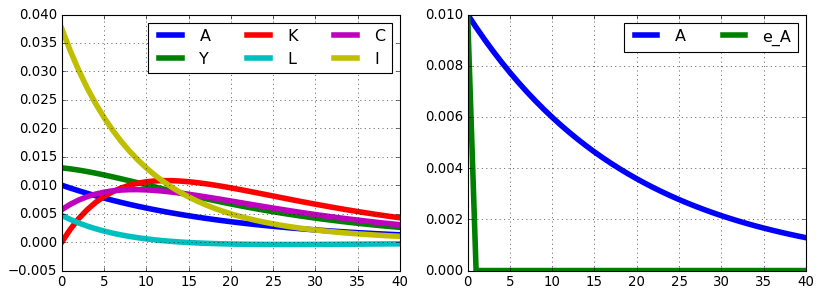

In [312]:
model.impulse(T=41,t0=0,shocks={'e_A':0.01},normalize=False)

fig = plt.figure(figsize=(12,4))
ax1 =fig.add_subplot(1,2,1)
(model.irs['e_A'][['A','Y','K','L','C','I']]).plot(lw='5',grid=True,ax=ax1).legend(loc='upper right',ncol=3)
ax2 =fig.add_subplot(1,2,2)
(model.irs['e_A'][['A','e_A']]).plot(lw='5',grid=True,ax=ax2).legend(loc='upper right',ncol=2)

## Stochastic Simulation

Next, it is created a $ T=401 $  period (including t=0) simulation by first simulating the model for 551 periods and then dropping the first 150 values. The standard deviation of successive productivity shocks is set to 0.01. Following Jenkins (2024), the seed for the numpy random number generator is set to 140000.

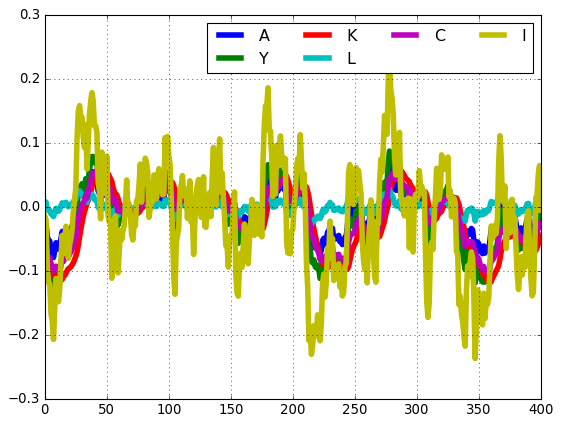

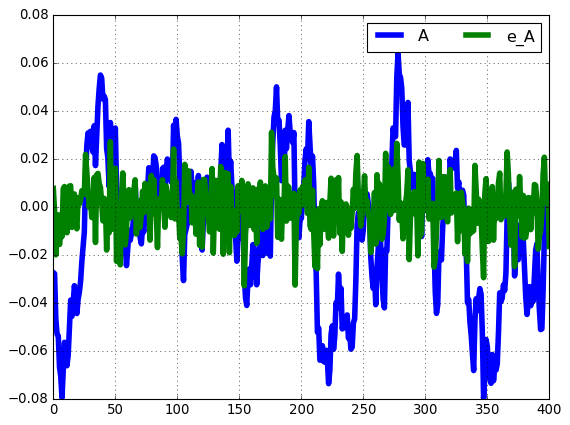

In [315]:
model.stoch_sim(T=401,drop_first=150,covariance_matrix=np.array([0.01**2]),seed=140000,normalize=False)
model.simulated[['A','Y','K','L','C','I']].plot(linewidth='5', grid=True).legend(loc='upper right',ncol=4)
model.simulated[['A']].plot(linewidth='5',grid=True).legend(ncol=4)
model.simulated['e_A'].plot(linewidth='5',grid=True).legend(ncol=4)

# Bibliographic references

* Bazán, C.; Larios, J.; Mougenot, B. & Almerco, J. (2021). Modelos de macroeconomía dinámica Fondo editorial USIL. https://fondoeditorialusil1719871532.publica.la/library/publication/modelos-de-macroeconomia-dinamica-1726782148

* Jenkins, B. (2024): Linearsolve: A Python module for solving linear dynamic models using Klein's (2000) method and creating custom simulations, https://github.com/letsgoexploring/linearsolve

* Stadler, G. (1994). Real business cycles. Journal of economic literature, 32 (4), pp. 1750-1783.

* Torres, J.L. (2016). Introduction to dynamic macroeconomic general equilibium models. 2nd Edition. Vernon Press.
